In [2]:
import numpy as np
import xarray as xr
import math
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
ds = xr.open_dataset('/data/jpetrie/MEOPAR/SalishSea/results/d9f69a38-160e-11e6-9b98-0025909a8461/SS5x5_1h_20041019_20041023_ptrc_T.nc')

In [5]:
print(ds)

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, deptht: 40, time_counter: 120, x: 5, y: 5)
Coordinates:
    nav_lat               (y, x) float32 -0.5 -0.5 -0.5 -0.5 -0.5 0.0 0.0 ...
    nav_lon               (y, x) float32 0.0 0.5 1.0 1.5 2.0 0.0 0.5 1.0 1.5 ...
  * deptht                (deptht) float32 1.28205 3.84615 6.41026 8.97436 ...
    time_centered         (time_counter) datetime64[ns] 2004-10-19T00:30:00 ...
  * time_counter          (time_counter) datetime64[ns] 2004-10-19T00:30:00 ...
  * axis_nbounds          (axis_nbounds) int64 0 1
  * x                     (x) int64 0 1 2 3 4
  * y                     (y) int64 0 1 2 3 4
Data variables:
    deptht_bounds         (deptht, axis_nbounds) float32 0.0 2.5641 2.5641 ...
    NO3                   (time_counter, deptht, y, x) float64 0.0 0.0 0.0 ...
    time_centered_bounds  (time_counter, axis_nbounds) float64 3.307e+09 ...
    time_counter_bounds   (time_counter, axis_nbounds) float64 3.307e+09 ...
    NH4       

In [9]:
print(ds.dims)
print(ds.dims['deptht'])

Frozen(SortedKeysDict({'x': 5, 'y': 5, 'axis_nbounds': 2, 'deptht': 40, 'time_counter': 120}))
40


In [10]:
ds.data_vars

Data variables:
    deptht_bounds         (deptht, axis_nbounds) float32 0.0 2.5641 2.5641 ...
    NO3                   (time_counter, deptht, y, x) float64 0.0 0.0 0.0 ...
    time_centered_bounds  (time_counter, axis_nbounds) float64 3.307e+09 ...
    time_counter_bounds   (time_counter, axis_nbounds) float64 3.307e+09 ...
    NH4                   (time_counter, deptht, y, x) float64 0.0 0.0 0.0 ...
    Si                    (time_counter, deptht, y, x) float64 0.0 0.0 0.0 ...
    PHY2                  (time_counter, deptht, y, x) float64 0.0 0.0 0.0 ...
    PHY                   (time_counter, deptht, y, x) float64 0.0 0.0 0.0 ...
    MYRI                  (time_counter, deptht, y, x) float64 0.0 0.0 0.0 ...
    MICZ                  (time_counter, deptht, y, x) float64 0.0 0.0 0.0 ...
    DOC                   (time_counter, deptht, y, x) float64 0.0 0.0 0.0 ...
    POC                   (time_counter, deptht, y, x) float64 0.0 0.0 0.0 ...
    bSi                   (time_counter,

In [21]:
ds.coords['nav_lat'].values

array([[-0.5, -0.5, -0.5, -0.5, -0.5],
       [ 0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.5,  0.5,  0.5,  0.5,  0.5],
       [ 1. ,  1. ,  1. ,  1. ,  1. ],
       [ 1.5,  1.5,  1.5,  1.5,  1.5]], dtype=float32)

In [16]:
ds.attrs

OrderedDict([('name', 'SS5x5_1h_20041019_20041023'),
             ('description', 'sog variables'),
             ('title', 'sog variables'),
             ('Conventions', 'CF-1.5'),
             ('production', 'An IPSL model'),
             ('timeStamp', '2016-May-09 10:52:56 PDT')])

array([   4.    ,    5.375 ,    8.375 , ...,  133.1875,    8.25  ,    7.625 ])

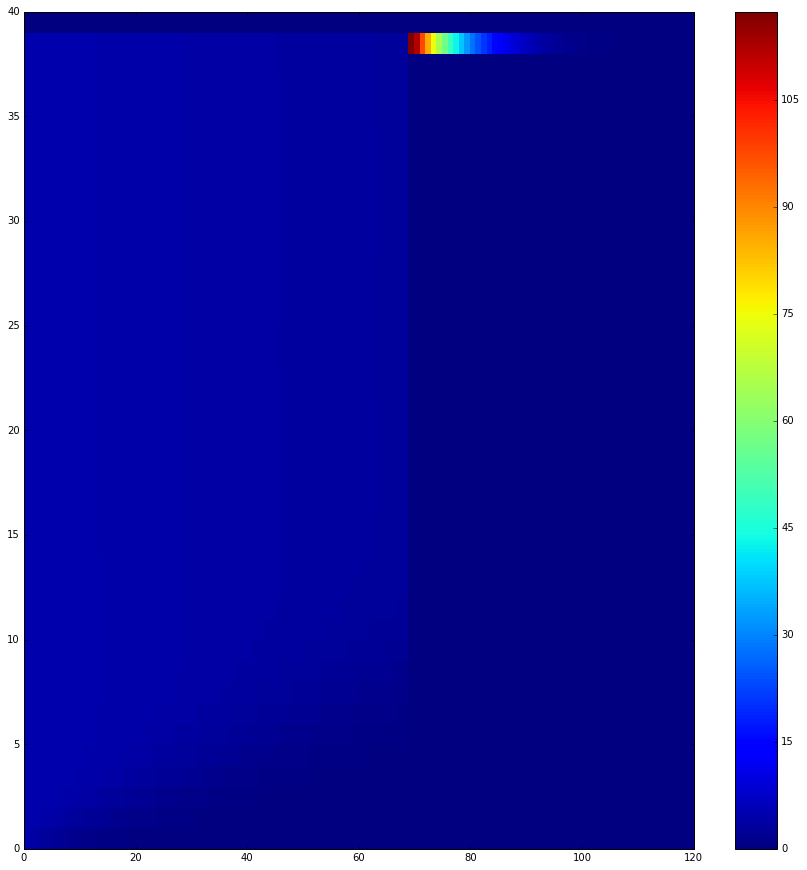

In [50]:
data_subset = ds.POC.values[:,:,2,2].T

fig, ax = plt.subplots(1, 1,figsize=(15,15))
mesh = ax.pcolormesh(data_subset)
fig.colorbar(mesh)
mesh.set_clim(vmin=data_subset.min(), vmax=data_subset.max())

In [46]:
data_subset.max()

1.0276473760604858